         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

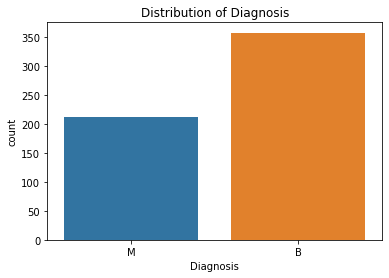

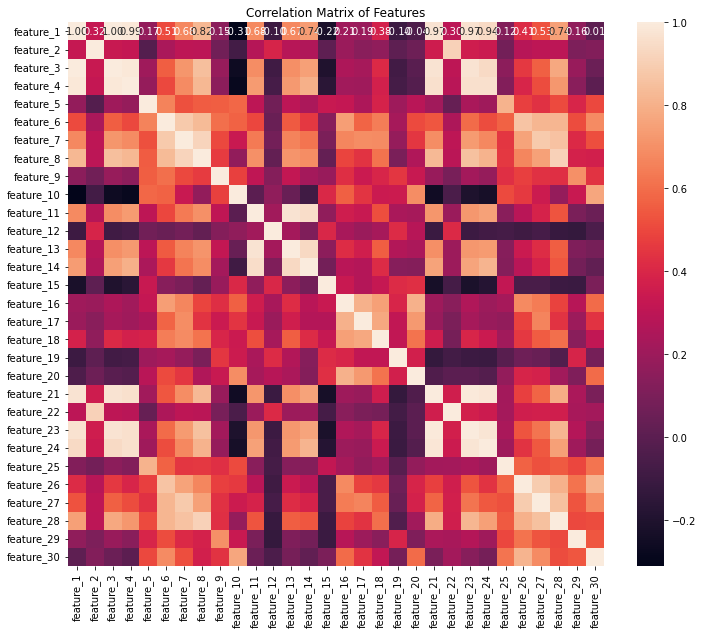

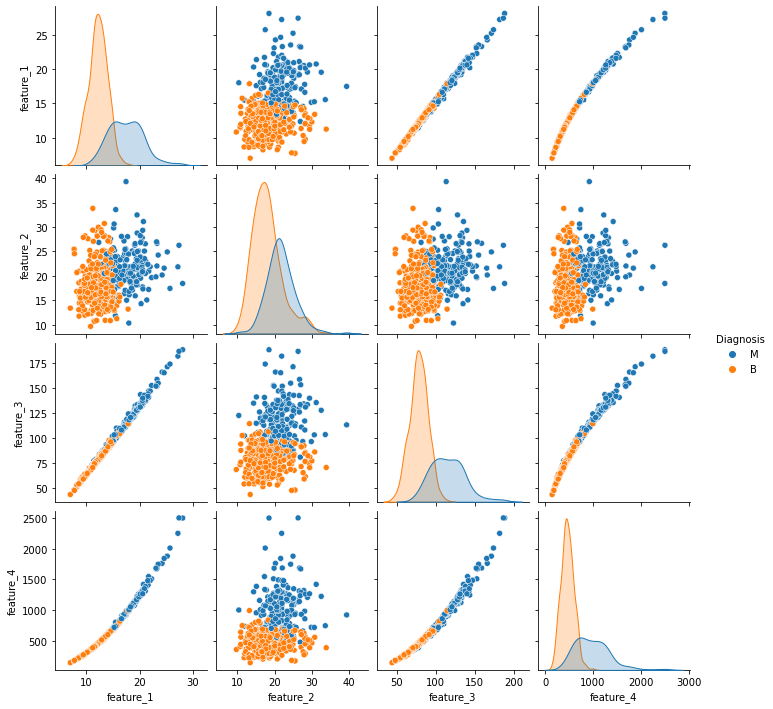

In [12]:
#Here I visualize the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, names=column_names)

# Data summary
print(data.head())
print(data.info())
print(data.describe())

# Visualize the distribution of the target variable
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

# Preprocess the data
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].apply(lambda x: 1 if x == 'M' else 0).values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the correlation matrix
correlation_matrix = data.iloc[:, 2:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Visualize the pairplot
sns.pairplot(data.iloc[:, 1:6], hue='Diagnosis')
plt.show()


In [2]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.1
Keras version: 2.13.1


4/4 [==============================] - 0s 2ms/step
Model 1 has the highest accuracy: 0.9736842105263158


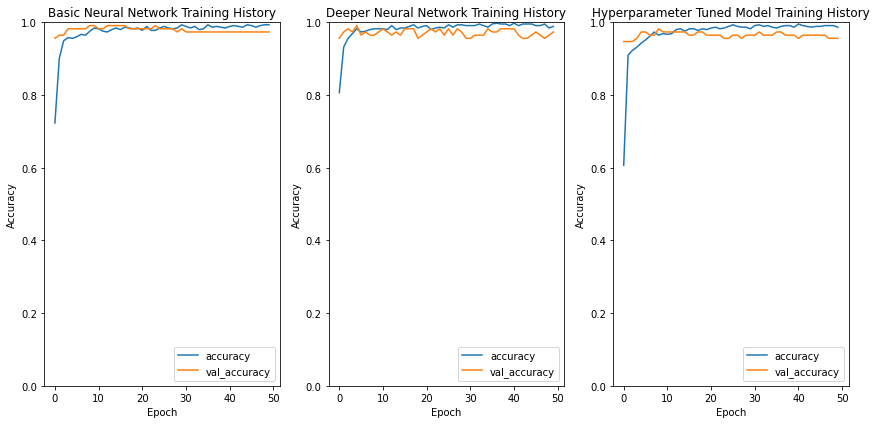

In [13]:

import tensorflow as tf
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier #it seems like tensoflow does not have keras.wrappers anymore so I import kerasclassifier  from scikeras
from scikeras.wrappers import KerasClassifier


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, names=column_names)

# Preprocess the data
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].apply(lambda x: 1 if x == 'M' else 0).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
def create_model1():
    model = Sequential()
    model.add(Dense(64, input_shape=(30,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model2():
    model = Sequential()
    model.add(Dense(128, input_shape=(30,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def create_model3():
    model = Sequential()
    model.add(Dense(128, input_shape=(30,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



# Train and evaluate Model 1
model1 = create_model1()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Train and evaluate Model 2
model2 = create_model2()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Train and evaluate Model 3
model3 = create_model3()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)





# Evaluate the models
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
accuracy1 = accuracy_score(y_test, y_pred1)

y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
accuracy2 = accuracy_score(y_test, y_pred2)

y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")
accuracy3 = accuracy_score(y_test, y_pred3)

# Compare the models
accuracies = [accuracy1, accuracy2, accuracy3]
best_model_index = np.argmax(accuracies) + 1  # Add 1 to get the model number starting from 1
best_model_accuracy = accuracies[best_model_index - 1]  # Subtract 1 to access list index
print(f"Model {best_model_index} has the highest accuracy: {best_model_accuracy}")


# Plot training history for all models
plt.figure(figsize=(12, 6))

# Model 1
plt.subplot(1, 3, 1)
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Basic Neural Network Training History')
plt.legend(loc='lower right')

# Model 2
plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Deeper Neural Network Training History')
plt.legend(loc='lower right')

# Model 3
plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Hyperparameter Tuned Model Training History')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
